# Data Diri
### Nama : Mohamad Akmal Ramadhanta
### Email: ramadhanta0412@gmail.com

# Import Library

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


%matplotlib inline

In [2]:
num_classes = 10  
num_epochs = 100
batch = 32

# Loading Data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape) 

(48000, 32, 32, 3)
(12000, 32, 32, 3)
(48000, 1)
(12000, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


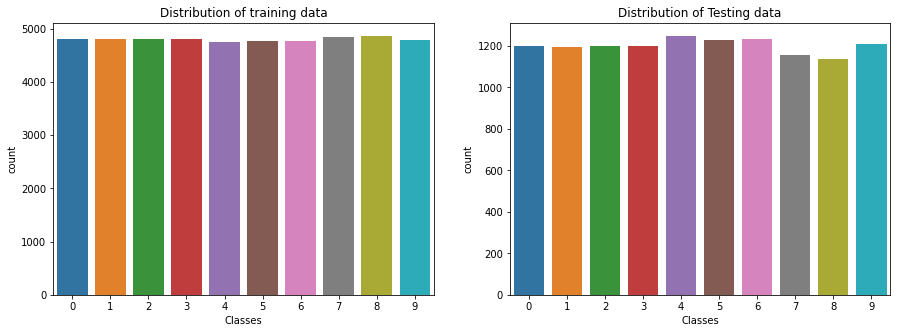

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot untuk training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot untuk testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

# Data Preprocess

In [7]:
# Normalisasi data. Sebelum mengubah tipe data menjadi float untuk komputasi
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Konversi vektor kelas ke matriks kelas biner menggunakan one hot encoding.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Data Modeling

In [8]:

def get_model():
  input_shape = (32, 32, 3)
  model = Sequential()

  
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.7))

 
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2,2), padding='same'))
  model.add(Dropout(0.3))

  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

In [9]:
opt = keras.optimizers.Adam(learning_rate=1.0000e-04)

model = get_model()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                        

# Training Model

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [11]:
history = model.fit(X_train, y_train,
            batch_size=batch,
            epochs=num_epochs,
            validation_data=(X_test, y_test),
            shuffle=True,
            callbacks=[callbacks])

Epoch 1/100
1500/1500 [==============================] - 21s 11ms/step - loss: 2.0242 - accuracy: 0.2277 - val_loss: 1.7519 - val_accuracy: 0.3694
Epoch 2/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.6467 - accuracy: 0.3841 - val_loss: 1.4951 - val_accuracy: 0.4477
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.4928 - accuracy: 0.4501 - val_loss: 1.4087 - val_accuracy: 0.4823
Epoch 4/100
1500/1500 [==============================] - 11s 8ms/step - loss: 1.3928 - accuracy: 0.4887 - val_loss: 1.2995 - val_accuracy: 0.5282
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.3170 - accuracy: 0.5230 - val_loss: 1.1820 - val_accuracy: 0.5765
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.2585 - accuracy: 0.5475 - val_loss: 1.1339 - val_accuracy: 0.5969
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.2099 - accuracy: 0.5651 - val_loss: 1.1193 

# Model Training Evaluation

In [12]:
score = model.evaluate(X_test, y_test)
print("Accuracy: ", score[1]*100, '%')

375/375 [==============================] - 1s 3ms/step - loss: 0.4589 - accuracy: 0.8410
Accuracy:  84.10000205039978 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


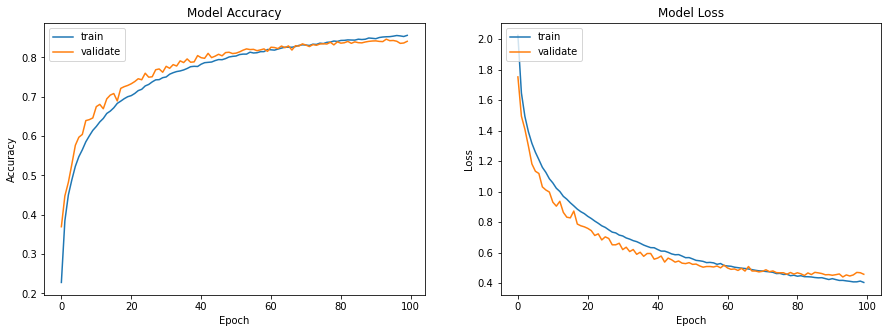

In [13]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # plot akurasi
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    # plot loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

print(history.history.keys())

plotmodelhistory(history)

In [14]:
# skor dari model yang dilatih.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

375/375 [==============================] - 1s 3ms/step - loss: 0.4589 - accuracy: 0.8410
Test loss: 0.4588976502418518
Test accuracy: 0.8410000205039978


In [15]:
# membuat prediksi.
pred = model.predict(X_test)

375/375 [==============================] - 1s 2ms/step


In [16]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Membuat Heatmap.
    """
    if not ax:
        ax = plt.gca()

    
    im = ax.imshow(data, **kwargs)

    
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    Fungsi untuk anotasi heatmap.
    """
    
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

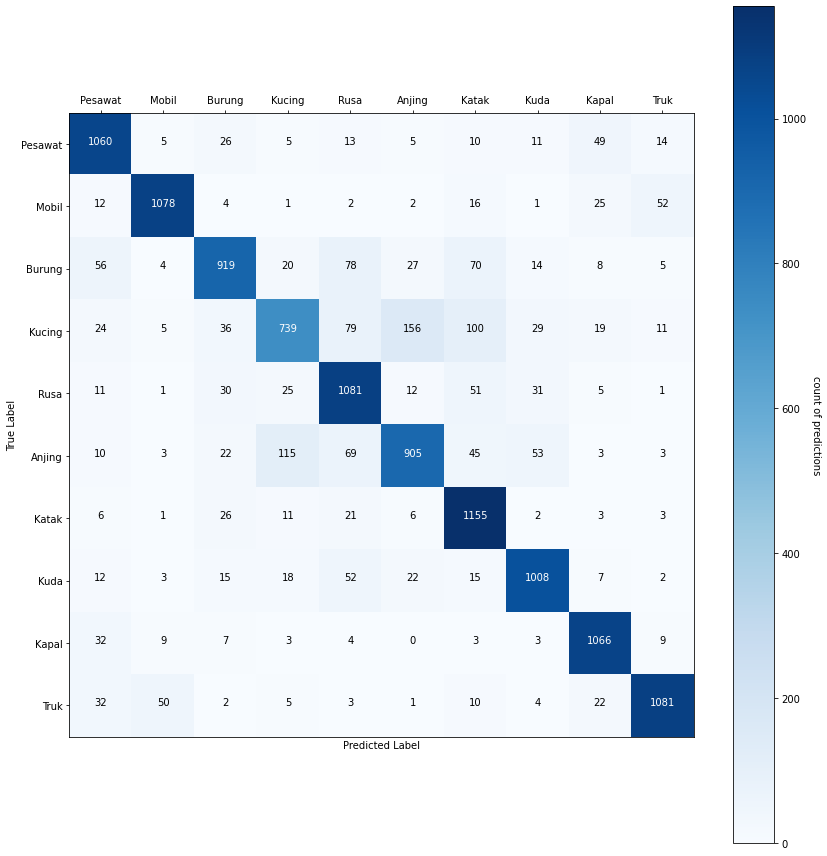

In [17]:
labels = ['Pesawat', 'Mobil', 'Burung', 'Kucing', 'Rusa', 'Anjing', 'Katak', 'Kuda', 'Kapal', 'Truk']


Y_pred_classes = np.argmax(pred, axis=1) 

Y_true = np.argmax(y_test, axis=1)

errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [18]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1198
           1       0.93      0.90      0.92      1193
           2       0.85      0.77      0.80      1201
           3       0.78      0.62      0.69      1198
           4       0.77      0.87      0.82      1248
           5       0.80      0.74      0.77      1228
           6       0.78      0.94      0.85      1234
           7       0.87      0.87      0.87      1154
           8       0.88      0.94      0.91      1136
           9       0.92      0.89      0.90      1210

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



# Model Predictions

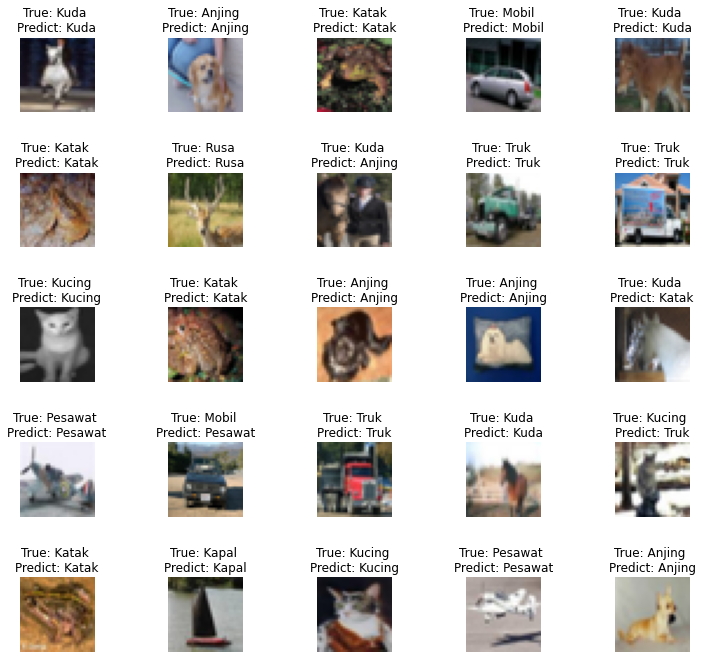

In [19]:
#prediksi benar
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

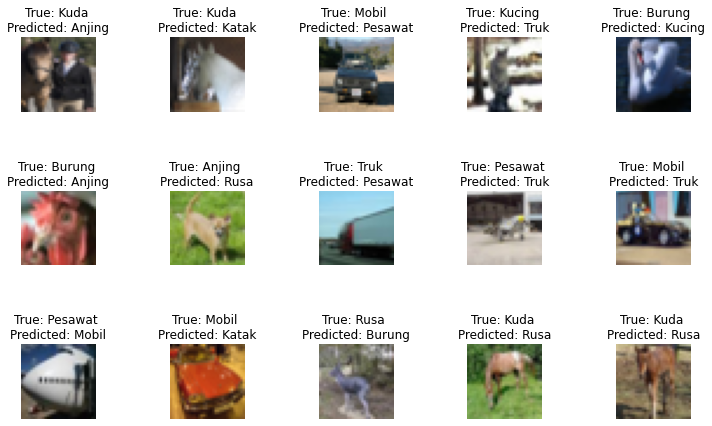

In [20]:
#prediksi salah
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(X_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

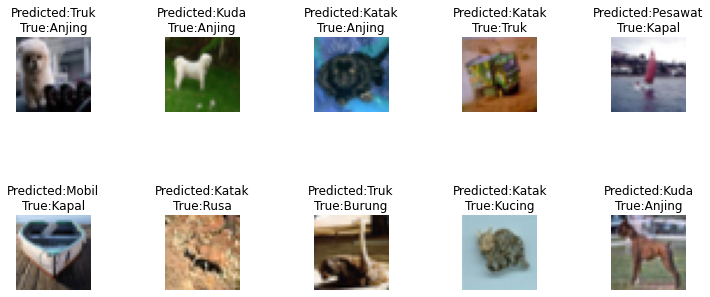

In [21]:
#prediksi yang error
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 10 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(12,6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32,3)))
            ax[row,col].set_title("Predicted:{}\nTrue:{}".
                                  format(labels[pred_errors[error]],labels[obs_errors[error]]))
            n += 1
            ax[row,col].axis('off')
            plt.subplots_adjust(wspace=1)

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 10 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 10 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

# Saving Model as tflite

In [22]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('cifa10_model.tflite')
tflite_model_file.write_bytes(tflite_model)

2187204